## Where is the most dangerous area in Toronto?

### 1. Import 

Here we import Pandas, Matplotlib and folium for data visualization

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from IPython.core.display import display, HTML
%matplotlib inline

# To show map in Github
def folium_deepnote_show(m):
    data = m.get_root().render()
    data_fixed_height = data.replace('width: 100%;height: 100%', 'width: 100%').replace('height: 100.0%;', 'height: 609px;', 1)
    display(HTML(data_fixed_height))

### 2. Read Data

This dataset includes all Major Crime Indicators (MCI) occurrences by reported date and related offences from 2014 to 2020 provided by Toronto police service.

Data source: https://data.torontopolice.on.ca/datasets/TorontoPS::major-crime-indicators-1/about

In [6]:
crime = pd.read_csv('Major_Crime_Indicators.csv',low_memory=False)

In [7]:
crime.head()

,X,Y,Index_,event_unique_id,Division,occurrencedate,reporteddate,premises_type,ucr_code,ucr_ext,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Hood_ID,Neighbourhood,Long,Lat,ObjectId
0,-8.859749e+06,5.423033e+06,10182,GO-20142103239,D23,2014/05/18 04:00:00+00,2014/05/18 04:00:00+00,House,1430,100,...,18.0,138.0,Sunday,12,Assault,1,West Humber-Clairville (1),-79.588477,43.725321,1
1,-8.861050e+06,5.426864e+06,10298,GO-20142111528,D23,2014/05/19 04:00:00+00,2014/05/19 04:00:00+00,Outside,1430,100,...,19.0,139.0,Monday,20,Assault,1,West Humber-Clairville (1),-79.600166,43.750187,2
2,-8.861412e+06,5.422084e+06,10300,GO-20142111859,D23,2014/05/19 04:00:00+00,2014/05/19 04:00:00+00,Apartment,2120,200,...,19.0,139.0,Monday,22,Break and Enter,1,West Humber-Clairville (1),-79.603420,43.719158,3
3,-8.859955e+06,5.424372e+06,10345,GO-20142116041,D23,2014/05/20 04:00:00+00,2014/05/20 04:00:00+00,Outside,1420,100,...,20.0,140.0,Tuesday,14,Assault,1,West Humber-Clairville (1),-79.590332,43.734013,4
4,-8.859955e+06,5.424372e+06,10346,GO-20142116041,D23,2014/05/20 04:00:00+00,2014/05/20 04:00:00+00,Outside,1420,110,...,20.0,140.0,Tuesday,14,Assault,1,West Humber-Clairville (1),-79.590332,43.734013,5


In [8]:
crime.columns

Index(['X', 'Y', 'Index_', 'event_unique_id', 'Division', 'occurrencedate',
       'reporteddate', 'premises_type', 'ucr_code', 'ucr_ext', 'offence',
       'reportedyear', 'reportedmonth', 'reportedday', 'reporteddayofyear',
       'reporteddayofweek', 'reportedhour', 'occurrenceyear',
       'occurrencemonth', 'occurrenceday', 'occurrencedayofyear',
       'occurrencedayofweek', 'occurrencehour', 'MCI', 'Hood_ID',
       'Neighbourhood', 'Long', 'Lat', 'ObjectId'],
      dtype='object')

In [9]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242879 entries, 0 to 242878
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   X                    242879 non-null  float64
 1   Y                    242879 non-null  float64
 2   Index_               242879 non-null  int64  
 3   event_unique_id      242879 non-null  object 
 4   Division             242879 non-null  object 
 5   occurrencedate       242879 non-null  object 
 6   reporteddate         242879 non-null  object 
 7   premises_type        242879 non-null  object 
 8   ucr_code             242879 non-null  int64  
 9   ucr_ext              242879 non-null  int64  
 10  offence              242879 non-null  object 
 11  reportedyear         242879 non-null  int64  
 12  reportedmonth        242879 non-null  object 
 13  reportedday          242879 non-null  int64  
 14  reporteddayofyear    242879 non-null  int64  
 15  reporteddayofweek

In [10]:
crime.describe()

,X,Y,Index_,ucr_code,ucr_ext,reportedyear,reportedday,reporteddayofyear,reportedhour,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour,Long,Lat,ObjectId
count,2.428790e+05,2.428790e+05,242879.000000,242879.000000,242879.000000,242879.000000,242879.000000,242879.000000,242879.000000,242802.000000,242802.000000,242802.000000,242879.000000,242879.000000,242879.000000,242879.000000
mean,-8.838283e+06,5.420252e+06,122936.510756,1699.654276,146.373898,2017.101301,15.744437,186.137048,12.832361,2017.056408,15.490989,185.543921,12.576460,-79.395649,43.707240,121440.000000
std,1.170621e+04,8.220373e+03,71077.969778,324.542550,51.829763,1.980121,8.771924,103.927376,6.545129,2.023671,8.910342,104.242089,7.230898,0.105159,0.053374,70113.272353
min,-8.909923e+06,5.358509e+06,1.000000,1410.000000,100.000000,2014.000000,1.000000,1.000000,0.000000,2000.000000,1.000000,1.000000,0.000000,-80.039196,43.304981,1.000000
25%,-8.846734e+06,5.413121e+06,61320.500000,1430.000000,100.000000,2015.000000,8.000000,98.000000,8.000000,2015.000000,8.000000,97.000000,7.000000,-79.471560,43.660942,60720.500000
50%,-8.838062e+06,5.419268e+06,122806.000000,1450.000000,100.000000,2017.000000,16.000000,188.000000,13.000000,2017.000000,16.000000,187.000000,14.000000,-79.393663,43.700876,121440.000000
75%,-8.830104e+06,5.427141e+06,184590.500000,2120.000000,200.000000,2019.000000,23.000000,276.000000,18.000000,2019.000000,23.000000,275.000000,19.000000,-79.322176,43.751983,182159.500000
max,-8.744299e+06,5.517228e+06,246040.000000,2135.000000,230.000000,2020.000000,31.000000,366.000000,23.000000,2020.000000,31.000000,366.000000,23.000000,-78.551376,44.333691,242879.000000


The dataset should only cover years from 2014 to 2020, remove all the years before 2014

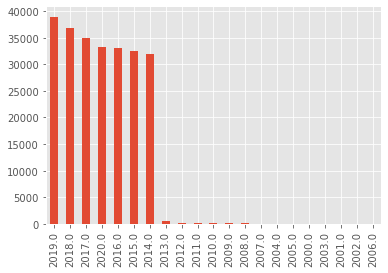

In [13]:
crime['occurrenceyear'].value_counts().plot(kind='bar');

In [14]:
crime = crime[crime['occurrenceyear'] >= 2014]

In [15]:
crime.describe()

,X,Y,Index_,ucr_code,ucr_ext,reportedyear,reportedday,reporteddayofyear,reportedhour,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour,Long,Lat,ObjectId
count,2.416390e+05,2.416390e+05,241639.000000,241639.000000,241639.000000,241639.000000,241639.000000,241639.000000,241639.000000,241639.000000,241639.000000,241639.000000,241639.000000,241639.000000,241639.000000,241639.000000
mean,-8.838293e+06,5.420243e+06,123222.467160,1700.262433,146.486188,2017.109126,15.746510,186.353515,12.826100,2017.085408,15.525718,185.615861,12.601761,-79.395734,43.707185,121394.821800
std,1.169776e+04,8.215762e+03,70962.644356,324.625119,51.840684,1.976795,8.770801,103.866934,6.551318,1.973705,8.889309,104.076747,7.220265,0.105083,0.053345,70092.047765
min,-8.904477e+06,5.358509e+06,1.000000,1410.000000,100.000000,2014.000000,1.000000,1.000000,0.000000,2014.000000,1.000000,1.000000,0.000000,-79.990277,43.304981,1.000000
25%,-8.846734e+06,5.413121e+06,61788.500000,1430.000000,100.000000,2015.000000,8.000000,98.000000,8.000000,2015.000000,8.000000,97.000000,7.000000,-79.471560,43.660942,60695.500000
50%,-8.838078e+06,5.419249e+06,123087.000000,1457.000000,100.000000,2017.000000,16.000000,189.000000,13.000000,2017.000000,16.000000,187.000000,14.000000,-79.393808,43.700752,121404.000000
75%,-8.830164e+06,5.427134e+06,184767.500000,2120.000000,200.000000,2019.000000,23.000000,276.000000,18.000000,2019.000000,23.000000,275.000000,19.000000,-79.322717,43.751941,182053.500000
max,-8.744299e+06,5.517228e+06,246040.000000,2135.000000,230.000000,2020.000000,31.000000,366.000000,23.000000,2020.000000,31.000000,366.000000,23.000000,-78.551376,44.333691,242879.000000


### 3. Data Visulization

In [16]:
plt.style.use('ggplot')

Filter top 10 neighbourhoods in Toronto with highest crime cases

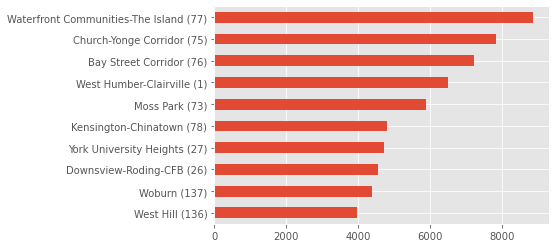

In [17]:
crime['Neighbourhood'].value_counts()[:10].sort_values().plot(kind='barh');

In [18]:
map_data = crime.groupby('Neighbourhood') \
    .aggregate({'Lat': 'mean', 'Long': 'mean', 'MCI': 'count'}) \
    .rename(columns={'MCI': 'crime_count'}) \
    .sort_values('crime_count', ascending=False) \
    .head(10)

Be careful when you hangout in below areas in Toronto at night!

In [23]:
m = folium.Map(location=(43.666550, -79.385261))

for i, row in map_data.iterrows():
    folium.Marker((row['Lat'], row['Long'])).add_to(m)
    
m

In [24]:
folium_deepnote_show(m)